# Process MWV monthly fuel sale data
Source: https://www.mwv.de/statistiken/mineraloelabsatz/ \
The crude oil sale data of the sales in Germany directly correlate with CO2 emissions for specific products like Diesel and Benzin (petrol). For other like heating oil it the sales of one month do not correlate to the emissions of this month, because it is probably burned during the year. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import isfile, join
import datetime as dt

# Change filenames

In [2]:
path = '../data/mobility/raw_data/MWV_FuelSale/mwv-statistiken-amtliche-mineraloeldaten/'
files = [f for f in os.listdir(path) if f.endswith(".xls") and
                  isfile(join(path, f)) and not f.startswith('.')]


#loop over files and replace word for month by number of month
for f in files:
    try:
        if 'Januar' in f:
            month_name = 'Januar'
            month = '01'
        elif 'Februar' in f:
            month_name = 'Februar'
            month = '02'
        elif 'Maerz' in f:
            month_name = 'Maerz'
            month = '03'
        elif 'MÑrz' in f:
            month_name = 'MÑrz'
            month = '03'
        elif 'April' in f:
            month_name = 'April'
            month = '04'
        elif 'Mai' in f:
            month_name = 'Mai'
            month = '05'
        elif 'Juni' in f:
            month_name = 'Juni'
            month = '06'
        elif 'Juli' in f:
            month_name = 'Juli'
            month = '07'
        elif 'August' in f:
            month_name = 'August'
            month = '08'
        elif 'September' in f:
            month_name = 'September'
            month = '09'
        elif 'Oktober' in f:
            month_name = 'Oktober'
            month = '10'
        elif 'November' in f:
            month_name = 'November'
            month = '11'
        elif 'Dezember' in f:
            month_name = 'Dezember'
            month = '12'

        os.rename(path + f, path + f.replace(month_name,month))
    except:
        print(f + ' ' + 'already processed!')

AMS0104.xls already processed!
AMS0110.xls already processed!
mwv-statistiken-mineraloelabsatzdaten-12-2017.xls already processed!
AMS0306.xls already processed!
AMS0312.xls already processed!
10_mwv-statistiken-mineraloelabsatzdaten-10-2018.xls already processed!
AMS0702.xls already processed!
AMS0703.xls already processed!
10_mwv-statistiken-mineraloelabsatzdaten-10-2019.xls already processed!
AMS0501.xls already processed!
AMS0307.xls already processed!
mwv-statistiken-mineraloelabsatzdaten-12-2016.xls already processed!
AMS0111.xls already processed!
AMS0105.xls already processed!
AMS0107.xls already processed!
AMS0311.xls already processed!
11_mwv-statistiken-mineraloelabsatzdaten-11-2019.xls already processed!
AMS0305.xls already processed!
AMS0503.xls already processed!
AMS0701.xls already processed!
AMS0502.xls already processed!
AMS0304.xls already processed!
AMS0310.xls already processed!
11_mwv-statistiken-mineraloelabsatzdaten-11-2018.xls already processed!
AMS0106.xls alre

# Processing
- Iterate over all available files and assign the information to the specific arrays
- create dataframe for each fuel type

In [3]:
files = [f for f in os.listdir(path) if f.endswith(".xls") or f.endswith(".XLS") and
                  isfile(join(path, f)) and not f.startswith('.')]

date = []

otto_insg = []
otto_chemWeiterVera = []
otto_luftfahrt = []
otto_schifffahrt = []
otto_militaer = []
otto_sonstige = []

diesel_insg = []
diesel_chemWeiterVera = []
diesel_luftfahrt = []
diesel_schifffahrt = []
diesel_militaer = []
diesel_sonstige = []

flugkraftstoff_leicht_insg = []
flugkraftstoff_leicht_chemWeiterVera = []
flugkraftstoff_leicht_luftfahrt = []
flugkraftstoff_leicht_schifffahrt = []
flugkraftstoff_leicht_militaer = []
flugkraftstoff_leicht_sonstige = []

flugkraftstoff_schwer_insg = []
flugkraftstoff_schwer_chemWeiterVera = []
flugkraftstoff_schwer_luftfahrt = []
flugkraftstoff_schwer_schifffahrt = []
flugkraftstoff_schwer_militaer = []
flugkraftstoff_schwer_sonstige = []

rohbenzin_insg = []
rohbenzin_chemWeiterVera = []
rohbenzin_luftfahrt = []
rohbenzin_schifffahrt = []
rohbenzin_militaer = []
rohbenzin_sonstige = []

benzinkomponenten_insg = []
benzinkomponenten_chemWeiterVera = []
benzinkomponenten_luftfahrt = []
benzinkomponenten_schifffahrt = []
benzinkomponenten_militaer = []
benzinkomponenten_sonstige = []

heizöl_leicht_insg = []
heizöl_leicht_chemWeiterVera = []
heizöl_leicht_luftfahrt = []
heizöl_leicht_schifffahrt = []
heizöl_leicht_militaer = []
heizöl_leicht_sonstige = []

heizöl_schwer_insg = []
heizöl_schwer_chemWeiterVera = []
heizöl_schwer_luftfahrt = []
heizöl_schwer_schifffahrt = []
heizöl_schwer_militaer = []
heizöl_schwer_sonstige = []

for f in files:

    #read month from filename
    try: 
        ver1 = f[-11:-4]
        month = ver1[0:2]
        year = ver1[3:7]
        year_int = int(year)
        month_int = int(month)
    except:
        ver2 = f[-8:-4]
        month = ver2[2:4]
        year = '20' + ver2[0:2]

    
    #read excel file
    df = pd.read_excel(path + f, 'Tab 7', skiprows=6)
    df = df.drop('Unnamed: 0',axis=1)
    df = df.drop([0,1],axis=0)

    #arrays
    mineraloelprodukt = df['Unnamed: 2']
    insgesamt = df['insgesamt']
    ChemischeWeiterverarbeitung = df['arbeitung']
    luftfahrt = df['Luftfahrt']
    schifffahrt = df['schiffahrt']
    militaer = df['Militär']
    sonsige = df['Sonstige']

    #create new dataframe
    df = pd.DataFrame({'mineraloelprodukt': mineraloelprodukt,
                   'insgesamt': insgesamt,
                   'ChemischeWeiterverarbeitung': ChemischeWeiterverarbeitung,
                   'luftfahrt': luftfahrt,
                   'schifffahrt': schifffahrt,
                   'militaer': militaer,
                   'sonstige': sonsige
                  })
    df = df.dropna(axis=0).reset_index(drop=True)

    # append arrays
    
    date.append(month + '-' + year)
    
    ind = int(np.where(df['mineraloelprodukt'] == 'Ottokraftstoff')[0])
    otto_insg.append(df['insgesamt'][ind]) 
    otto_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    otto_luftfahrt.append(df['luftfahrt'][ind]) 
    otto_schifffahrt.append(df['schifffahrt'][ind]) 
    otto_militaer.append(df['militaer'][ind]) 
    otto_sonstige.append(df['sonstige'][ind]) 
    
    ind = int(np.where(df['mineraloelprodukt'] == 'Dieselkraftstoff')[0])
    diesel_insg.append(df['insgesamt'][ind]) 
    diesel_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    diesel_luftfahrt.append(df['luftfahrt'][ind]) 
    diesel_schifffahrt.append(df['schifffahrt'][ind]) 
    diesel_militaer.append(df['militaer'][ind]) 
    diesel_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Flugturb.Kraftst.,leicht')[0]) 
    flugkraftstoff_leicht_insg.append(df['insgesamt'][ind]) 
    flugkraftstoff_leicht_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    flugkraftstoff_leicht_luftfahrt.append(df['luftfahrt'][ind]) 
    flugkraftstoff_leicht_schifffahrt.append(df['schifffahrt'][ind]) 
    flugkraftstoff_leicht_militaer.append(df['militaer'][ind]) 
    flugkraftstoff_leicht_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Flugturb.Kraftst.,schwer')[0])
    flugkraftstoff_schwer_insg.append(df['insgesamt'][ind]) 
    flugkraftstoff_schwer_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    flugkraftstoff_schwer_luftfahrt.append(df['luftfahrt'][ind]) 
    flugkraftstoff_schwer_schifffahrt.append(df['schifffahrt'][ind]) 
    flugkraftstoff_schwer_militaer.append(df['militaer'][ind]) 
    flugkraftstoff_schwer_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Rohbenzin')[0])
    rohbenzin_insg.append(df['insgesamt'][ind]) 
    rohbenzin_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    rohbenzin_luftfahrt.append(df['luftfahrt'][ind]) 
    rohbenzin_schifffahrt.append(df['schifffahrt'][ind]) 
    rohbenzin_militaer.append(df['militaer'][ind]) 
    rohbenzin_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Benzinkomponenten')[0])
    benzinkomponenten_insg.append(df['insgesamt'][ind]) 
    benzinkomponenten_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    benzinkomponenten_luftfahrt.append(df['luftfahrt'][ind]) 
    benzinkomponenten_schifffahrt.append(df['schifffahrt'][ind]) 
    benzinkomponenten_militaer.append(df['militaer'][ind]) 
    benzinkomponenten_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Heizöl, leicht')[0])
    heizöl_leicht_insg.append(df['insgesamt'][ind]) 
    heizöl_leicht_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    heizöl_leicht_luftfahrt.append(df['luftfahrt'][ind]) 
    heizöl_leicht_schifffahrt.append(df['schifffahrt'][ind]) 
    heizöl_leicht_militaer.append(df['militaer'][ind]) 
    heizöl_leicht_sonstige.append(df['sonstige'][ind]) 

    ind = int(np.where(df['mineraloelprodukt'] == 'Heizöl, schwer')[0])
    heizöl_schwer_insg.append(df['insgesamt'][ind]) 
    heizöl_schwer_chemWeiterVera.append(df['ChemischeWeiterverarbeitung'][ind]) 
    heizöl_schwer_luftfahrt.append(df['luftfahrt'][ind]) 
    heizöl_schwer_schifffahrt.append(df['schifffahrt'][ind]) 
    heizöl_schwer_militaer.append(df['militaer'][ind]) 
    heizöl_schwer_sonstige.append(df['sonstige'][ind]) 


#otto
df_otto = pd.DataFrame({'date': date,
                        'FuelSale_tons_ottokraftstoff_insg': otto_insg,
                        'FuelSale_tons_ottokraftstoff_chemWeiterVera': otto_chemWeiterVera,
                        'FuelSale_tons_ottokraftstoff_luftfahrt': otto_luftfahrt,
                        'FuelSale_tons_ottokraftstoff_schifffahrt': otto_schifffahrt,
                        'FuelSale_tons_ottokraftstoff_militaer': otto_militaer,
                        'FuelSale_tons_ottokraftstoff_sonstige': otto_sonstige
                        })
df_otto.index = pd.to_datetime(df_otto.date, format='%m-%Y').dt.to_period('m')    
df_otto = df_otto.drop('date',axis=1)
df_otto = df_otto.sort_index()

#diesel
df_diesel = pd.DataFrame({'date': date,
                        'FuelSale_tons_dieselkraftstoff_insg': diesel_insg,
                        'FuelSale_tons_dieselkraftstoff_chemWeiterVera': diesel_chemWeiterVera,
                        'FuelSale_tons_dieselkraftstoff_luftfahrt': diesel_luftfahrt,
                        'FuelSale_tons_dieselkraftstoff_schifffahrt': diesel_schifffahrt,
                        'FuelSale_tons_dieselkraftstoff_militaer': diesel_militaer,
                        'FuelSale_tons_dieselkraftstoff_sonstige': diesel_sonstige
                        })
df_diesel.index = pd.to_datetime(df_diesel.date, format='%m-%Y').dt.to_period('m')    
df_diesel = df_diesel.drop('date',axis=1)
df_diesel = df_diesel.sort_index()


#flugkraftstoff_leicht
df_flugkraftstoff_leicht = pd.DataFrame({'date': date,
                        'FuelSale_tons_flugkraftstoff_leicht_insg': flugkraftstoff_leicht_insg,
                        'FuelSale_tons_flugkraftstoff_leicht_chemWeiterVera': flugkraftstoff_leicht_chemWeiterVera,
                        'FuelSale_tons_flugkraftstoff_leicht_luftfahrt': flugkraftstoff_leicht_luftfahrt,
                        'FuelSale_tons_flugkraftstoff_leicht_schifffahrt': flugkraftstoff_leicht_schifffahrt,
                        'FuelSale_tons_flugkraftstoff_leicht_militaer': flugkraftstoff_leicht_militaer,
                        'FuelSale_tons_flugkraftstoff_leicht_sonstige': flugkraftstoff_leicht_sonstige
                        })
df_flugkraftstoff_leicht.index = pd.to_datetime(df_flugkraftstoff_leicht.date, format='%m-%Y').dt.to_period('m')    
df_flugkraftstoff_leicht = df_flugkraftstoff_leicht.drop('date',axis=1)
df_flugkraftstoff_leicht = df_flugkraftstoff_leicht.sort_index()

    
#flugkraftstoff_schwer
df_flugkraftstoff_schwer = pd.DataFrame({'date': date,
                        'FuelSale_tons_flugkraftstoff_schwer_insg': flugkraftstoff_schwer_insg,
                        'FuelSale_tons_flugkraftstoff_schwer_chemWeiterVera': flugkraftstoff_schwer_chemWeiterVera,
                        'FuelSale_tons_flugkraftstoff_schwer_luftfahrt': flugkraftstoff_schwer_luftfahrt,
                        'FuelSale_tons_flugkraftstoff_schwer_schifffahrt': flugkraftstoff_schwer_schifffahrt,
                        'FuelSale_tons_flugkraftstoff_schwer_militaer': flugkraftstoff_schwer_militaer,
                        'FuelSale_tons_flugkraftstoff_schwer_sonstige': flugkraftstoff_schwer_sonstige
                        })
df_flugkraftstoff_schwer.index = pd.to_datetime(df_flugkraftstoff_schwer.date, format='%m-%Y').dt.to_period('m')    
df_flugkraftstoff_schwer = df_flugkraftstoff_schwer.drop('date',axis=1)
df_flugkraftstoff_schwer = df_flugkraftstoff_schwer.sort_index()

#rohbenzin
df_rohbenzin = pd.DataFrame({'date': date,
                        'FuelSale_rohbenzin_tons_insg': rohbenzin_insg,
                        'FuelSale_rohbenzin_tons_chemWeiterVera': rohbenzin_chemWeiterVera,
                        'FuelSale_rohbenzin_tons_luftfahrt': rohbenzin_luftfahrt,
                        'FuelSale_rohbenzin_tons_schifffahrt': rohbenzin_schifffahrt,
                        'FuelSale_rohbenzin_tons_militaer': rohbenzin_militaer,
                        'FuelSale_rohbenzin_tons_sonstige': rohbenzin_sonstige
                        })
df_rohbenzin.index = pd.to_datetime(df_rohbenzin.date, format='%m-%Y').dt.to_period('m')    
df_rohbenzin = df_rohbenzin.drop('date',axis=1)
df_rohbenzin = df_rohbenzin.sort_index()


#benzinkomponenten 
df_benzinkomponenten = pd.DataFrame({'date': date,
                        'FuelSale_tons_benzinkomponenten_insg': benzinkomponenten_insg,
                        'FuelSale_tons_benzinkomponenten_chemWeiterVera': benzinkomponenten_chemWeiterVera,
                        'FuelSale_tons_benzinkomponenten_luftfahrt': benzinkomponenten_luftfahrt,
                        'FuelSale_tons_benzinkomponenten_schifffahrt': benzinkomponenten_schifffahrt,
                        'FuelSale_tons_benzinkomponenten_militaer': benzinkomponenten_militaer,
                        'FuelSale_tons_benzinkomponenten_sonstige': benzinkomponenten_sonstige
                        })
df_benzinkomponenten.index = pd.to_datetime(df_benzinkomponenten.date, format='%m-%Y').dt.to_period('m')    
df_benzinkomponenten = df_benzinkomponenten.drop('date',axis=1)
df_benzinkomponenten = df_benzinkomponenten.sort_index()


#heizöl_leicht
df_heizöl_leicht = pd.DataFrame({'date': date,
                        'FuelSale_tons_heizoel_leicht_insg': heizöl_leicht_insg,
                        'FuelSale_tons_heizoel_leicht_chemWeiterVera': heizöl_leicht_chemWeiterVera,
                        'FuelSale_tons_heizoel_leicht_luftfahrt': heizöl_leicht_luftfahrt,
                        'FuelSale_tons_heizoel_leicht_schifffahrt': heizöl_leicht_schifffahrt,
                        'FuelSale_tons_heizoel_leicht_militaer': heizöl_leicht_militaer,
                        'FuelSale_tons_heizoel_leicht_sonstige': heizöl_leicht_sonstige
                        })
df_heizöl_leicht.index = pd.to_datetime(df_heizöl_leicht.date, format='%m-%Y').dt.to_period('m')    
df_heizöl_leicht = df_heizöl_leicht.drop('date',axis=1)
df_heizöl_leicht = df_heizöl_leicht.sort_index()

#heizöl_schwer
df_heizöl_schwer = pd.DataFrame({'date': date,
                        'FuelSale_tons_heizoel_schwer_insg': heizöl_schwer_insg,
                        'FuelSale_tons_heizoel_schwer_chemWeiterVera': heizöl_schwer_chemWeiterVera,
                        'FuelSale_tons_heizoel_schwer_luftfahrt': heizöl_schwer_luftfahrt,
                        'FuelSale_tons_heizoel_schwer_schifffahrt': heizöl_schwer_schifffahrt,
                        'FuelSale_tons_heizoel_schwer_militaer': heizöl_schwer_militaer,
                        'FuelSale_tons_heizoel_schwer_sonstige': heizöl_schwer_sonstige
                        })
df_heizöl_schwer.index = pd.to_datetime(df_heizöl_schwer.date, format='%m-%Y').dt.to_period('m')    
df_heizöl_schwer = df_heizöl_schwer.drop('date',axis=1)
df_heizöl_schwer = df_heizöl_schwer.sort_index()


In [4]:
#mobility
for column in df_otto:
    ind = np.where(df_otto[column] == 0)[0]
    df_otto[column][ind] = np.nan
    if np.isnan(np.nanmean(df_otto[column])):
        df_otto = df_otto.drop(column, axis=1)
df_otto = df_otto.dropna() 

for column in df_diesel:
    ind = np.where(df_diesel[column] == 0)[0]
    df_diesel[column][ind] = np.nan
    if np.isnan(np.nanmean(df_diesel[column])):
        df_diesel = df_diesel.drop(column, axis=1)
df_diesel = df_diesel.dropna()

for column in df_flugkraftstoff_schwer:
    ind = np.where(df_flugkraftstoff_schwer[column] == 0)[0]
    df_flugkraftstoff_schwer[column][ind] = np.nan
    if np.isnan(np.nanmean(df_flugkraftstoff_schwer[column])):
        df_flugkraftstoff_schwer = df_flugkraftstoff_schwer.drop(column, axis=1)
df_flugkraftstoff_schwer = df_flugkraftstoff_schwer.dropna()


#energy and household
for column in df_heizöl_leicht:
    ind = np.where(df_heizöl_leicht[column] == 0)[0]
    df_heizöl_leicht[column][ind] = np.nan
    if np.isnan(np.nanmean(df_heizöl_leicht[column])):
        df_heizöl_leicht = df_heizöl_leicht.drop(column, axis=1)
df_heizöl_leicht = df_heizöl_leicht.dropna()

for column in df_heizöl_schwer:
    ind = np.where(df_heizöl_schwer[column] == 0)[0]
    df_heizöl_schwer[column][ind] = np.nan
    if np.isnan(np.nanmean(df_heizöl_schwer[column])):
        df_heizöl_schwer = df_heizöl_schwer.drop(column, axis=1)
df_heizöl_schwer = df_heizöl_schwer.dropna()


#economy
for column in df_rohbenzin:
    ind = np.where(df_rohbenzin[column] == 0)[0]
    df_rohbenzin[column][ind] = np.nan
    if np.isnan(np.nanmean(df_rohbenzin[column])):
        df_rohbenzin = df_rohbenzin.drop(column, axis=1)
df_rohbenzin = df_rohbenzin.dropna()

for column in df_benzinkomponenten:
    ind = np.where(df_benzinkomponenten[column] == 0)[0]
    df_benzinkomponenten[column][ind] = np.nan
    if np.isnan(np.nanmean(df_benzinkomponenten[column])):
        df_benzinkomponenten = df_benzinkomponenten.drop(column, axis=1)
df_benzinkomponenten = df_benzinkomponenten.dropna()





/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopy

# Save dataframes in correlated sectors

## Mobility

In [5]:

if df_otto.shape[0] != 0:
    df_otto.to_csv('../data/mobility/M_FuelSale_Ottokraftstoff.csv')


if df_diesel.shape[0] != 0:
    df_diesel.to_csv('../data/mobility/M_FuelSale_Dieselkraftstoff.csv')


if df_flugkraftstoff_schwer.shape[0] != 0:
    df_flugkraftstoff_schwer.to_csv('../data/mobility/M_FuelSale_FlugkraftstoffSchwer.csv')

In [6]:
df_flugkraftstoff_schwer.head()

,FuelSale_tons_flugkraftstoff_schwer_insg,FuelSale_tons_flugkraftstoff_schwer_luftfahrt,FuelSale_tons_flugkraftstoff_schwer_militaer,FuelSale_tons_flugkraftstoff_schwer_sonstige
date,,,,
2001-01,527959.0,491936.0,7792.0,28231.0
2001-02,506565.0,473197.0,7118.0,26250.0
2001-03,559968.0,531945.0,3880.0,24143.0
2001-04,565836.0,545991.0,2751.0,17094.0
2001-05,580793.0,553414.0,6823.0,20556.0


## Energy and Household

In [7]:

if df_heizöl_leicht.shape[0] != 0:
    df_heizöl_leicht.to_csv('../data/energy_households/E_FuelSale_HeizoelLeicht.csv')

if df_heizöl_schwer.shape[0] != 0:
    df_heizöl_schwer.to_csv('../data/energy_households/E_FuelSale_HeizoelSchwer.csv')

## Economy

In [8]:

if df_rohbenzin.shape[0] != 0:
    df_rohbenzin.to_csv('../data/economy/ECO_FuelSale_Rohbenzin.csv')

if df_benzinkomponenten.shape[0] != 0:    
    df_benzinkomponenten.to_csv('../data/economy/ECO_FuelSale_Benzinkomponenten.csv')

Text(0.5, 0, 'tons diesel fuel')

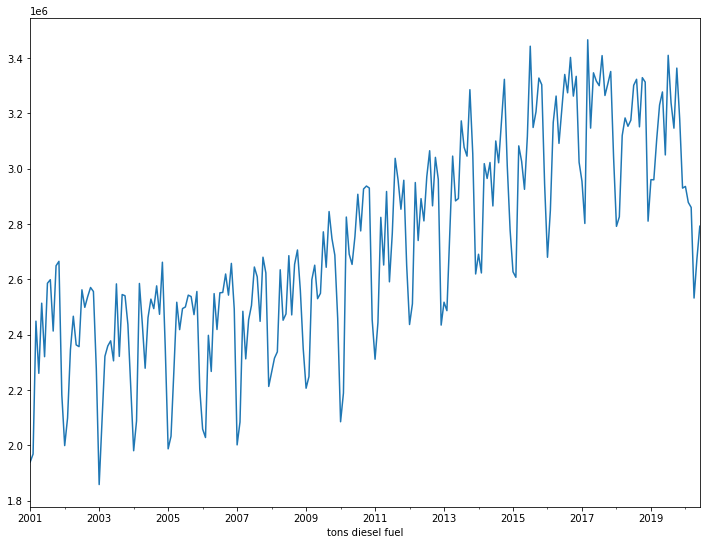

In [9]:
df_diesel['FuelSale_tons_dieselkraftstoff_insg'].plot(figsize=(12,9))
plt.xlabel('tons diesel fuel')